# Install dan Import Library

Install yfinance API untuk dapat mengakses data dari situs Yahoo! Finance secara langsung

In [1]:
!pip install yfinance

Import library yang diperlukan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from pandas_datareader import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.metrics import mean_absolute_error

In [3]:
yf.pdr_override()

# Retrieving Stock Data

Dalam analisis, data yang digunakan adalah data pergerakan saham dari TOP 5 saham perbankan yang diambil 3 tahun terakhir yang terdiri dari:
* BBCA
* BBRI
* BMRI
* BRIS
* BBNI

Data diambil dari situs yahoo finance (https://finance.yahoo.com/) menggunakan Yahoo! Finance API


In [4]:
bank_list = ['BBCA.JK', 'BBRI.JK', 'BMRI.JK', 'BRIS.JK', 'BBNI.JK']
company_name = ["BBCA", "BBRI", "BMRI", "BRIS", 'BBNI']

for i, com in enumerate(company_name):
    globals()[com] = yf.download(bank_list[i], period='3Y')

company_list = [BBCA, BBRI, BMRI, BRIS, BBNI]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Berhasil mendapatkan data dari kelima bank tersebut

menampilkan contoh data yang berhasil didapatkan (contoh pada bank BCA)

In [5]:
BBCA

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-14,6000.0,6115.0,5985.0,6050.0,5702.280762,138115000
2020-09-15,6040.0,6100.0,5860.0,5860.0,5523.200195,170087000
2020-09-16,5860.0,5870.0,5745.0,5750.0,5419.521973,158565500
2020-09-17,5750.0,5855.0,5665.0,5755.0,5424.234863,138796000
2020-09-18,5700.0,5735.0,5570.0,5630.0,5306.419434,316912000
...,...,...,...,...,...,...
2023-09-06,9200.0,9250.0,9150.0,9150.0,9150.000000,49318400
2023-09-07,9125.0,9175.0,9100.0,9175.0,9175.000000,61405200
2023-09-08,9100.0,9150.0,9050.0,9125.0,9125.000000,80732300


# EDA (Exploratory Data Analysis)

In [6]:
BBCA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 729 entries, 2020-09-14 to 2023-09-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       729 non-null    float64
 1   High       729 non-null    float64
 2   Low        729 non-null    float64
 3   Close      729 non-null    float64
 4   Adj Close  729 non-null    float64
 5   Volume     729 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 39.9 KB


menampilkan informasi dari data. Dapat dilihat bahwa data tersebut telah diurutkan berdasarkan index tanggal (datetime indexed)

## How's The Data Descriptive Statistics?

In [7]:
BBCA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,729.000000,729.000000,729.000000,729.000000,729.000000,7.290000e+02
mean,7588.100137,7654.368999,7520.048011,7587.201646,7366.524971,8.803348e+07
std,1046.020450,1052.336105,1048.476703,1051.212076,1139.368813,5.608534e+07
min,5430.000000,5535.000000,5390.000000,5420.000000,5108.489258,1.065390e+07
25%,6600.000000,6620.000000,6550.000000,6600.000000,6312.597656,5.909290e+07
50%,7575.000000,7625.000000,7475.000000,7575.000000,7333.541504,7.674740e+07
75%,8525.000000,8625.000000,8475.000000,8550.000000,8382.450195,1.039545e+08
max,9425.000000,9450.000000,9375.000000,9400.000000,9400.000000,7.228279e+08


Menampilkan nilai-nilai statistika dari data.

## How's Stocks Price Performance and it's Trade Volume?

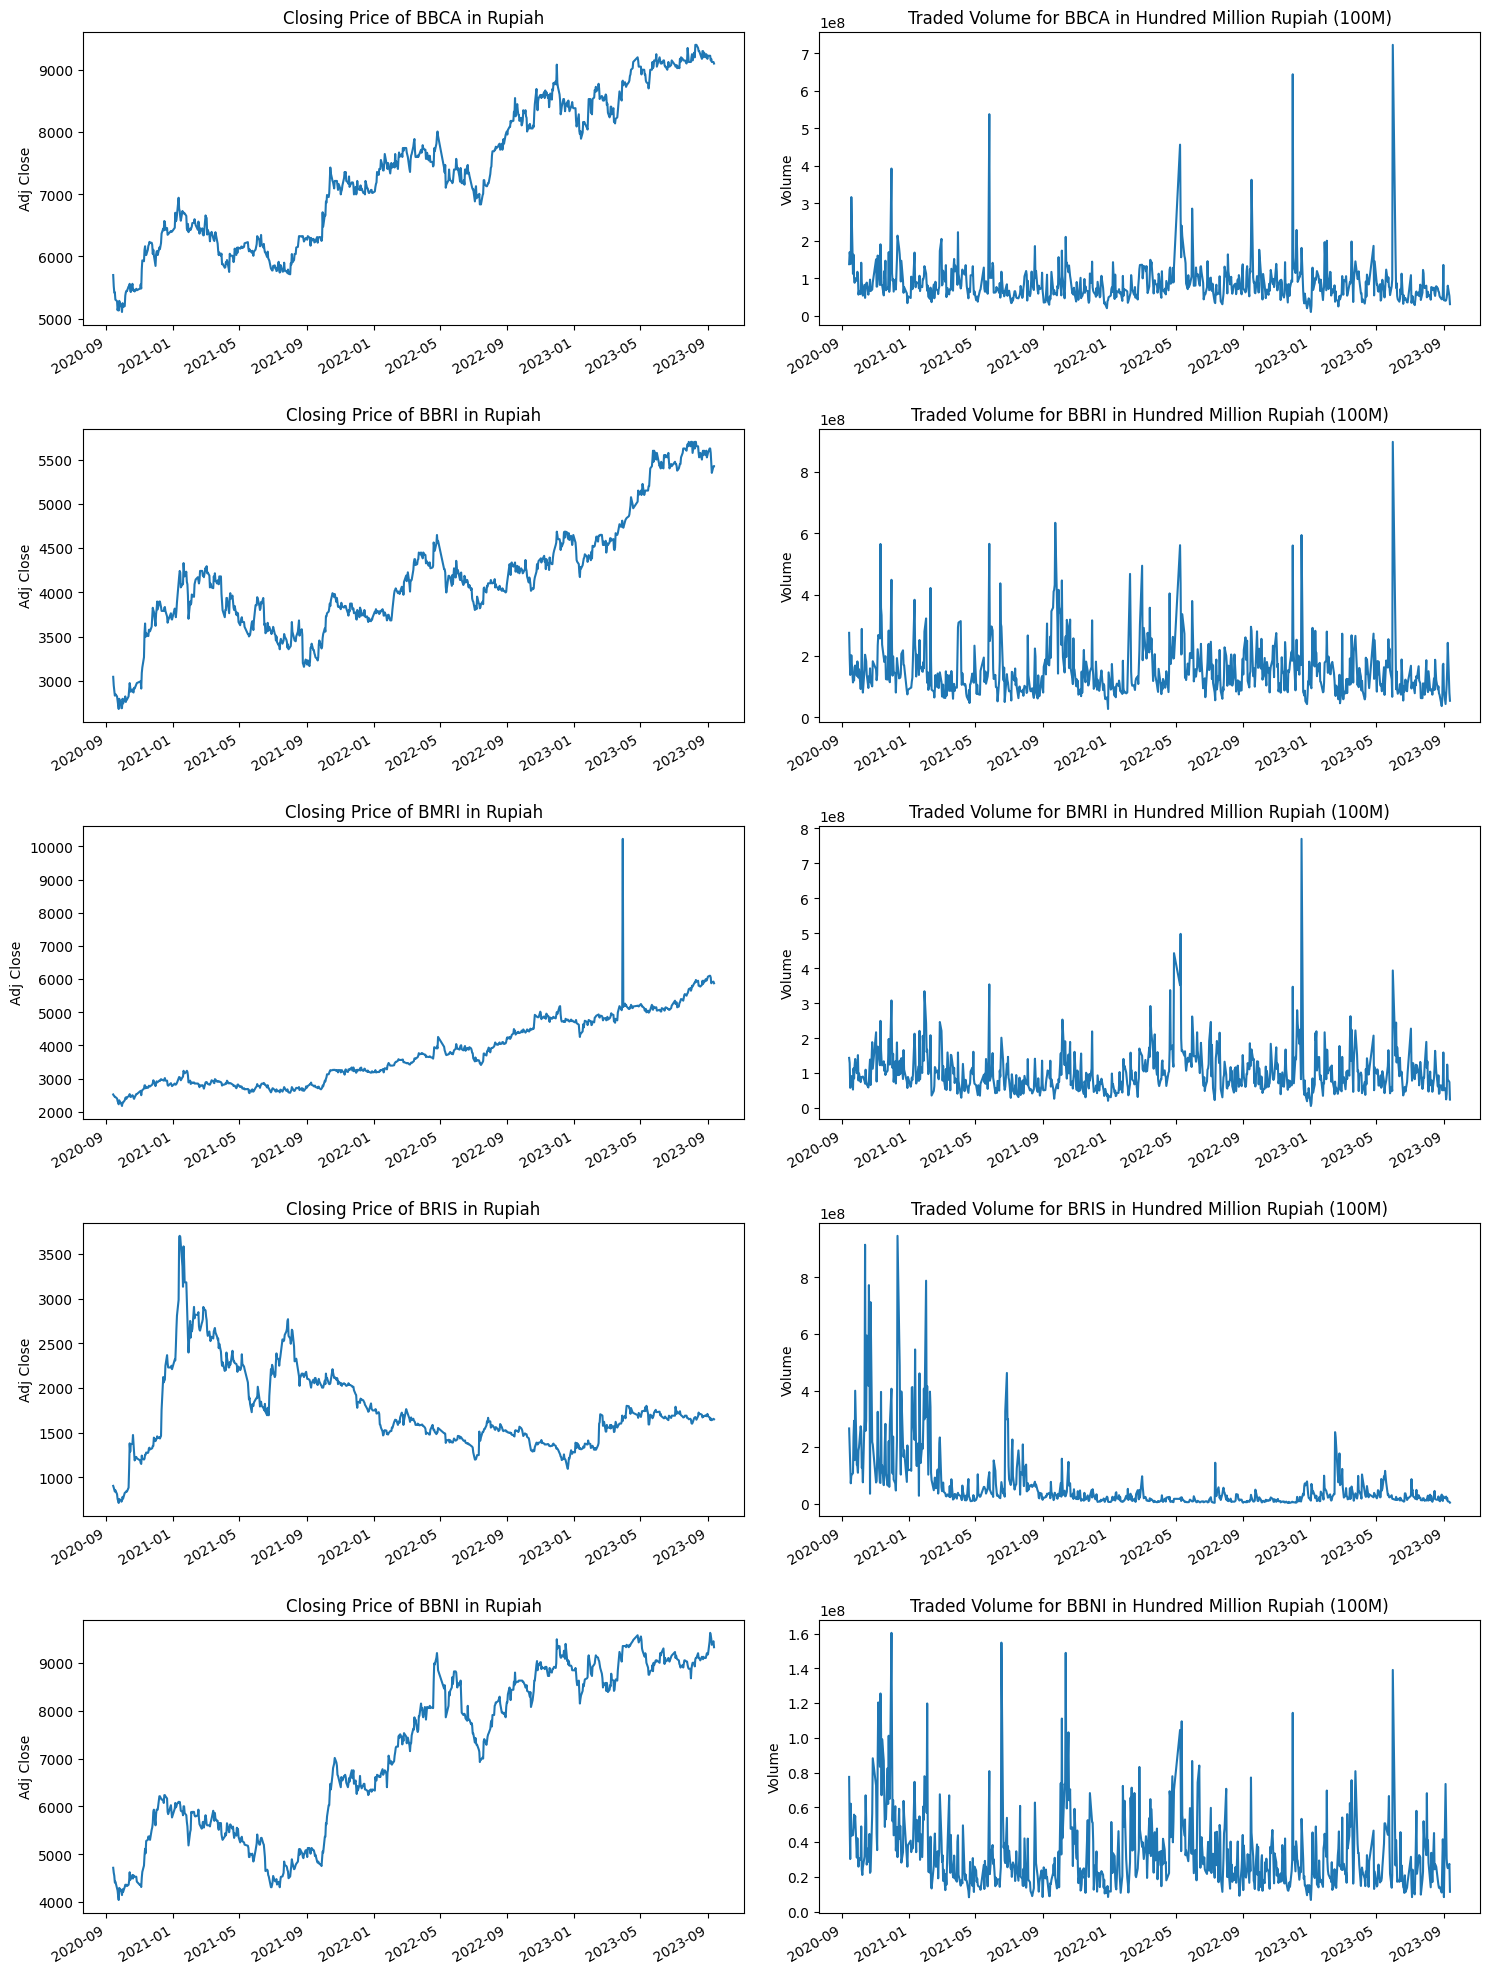

In [8]:
plt.figure(figsize=(15, 20))

for i, company in enumerate(company_list):
    plt.subplot(len(company_list),2 , i*2+1)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company_name[i]} in Rupiah")

    plt.subplot(len(company_list),2 , i*2+2)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Traded Volume for {company_name[i]} in Hundred Million Rupiah (100M)")

plt.tight_layout()

Untuk meninjau performa pergerakan harga saham dan volume transaksi dari masing-masing bank, dapat dilihat dari grafik di atas.

BBCA, BBNI dan BBRI memiliki pola yang baik. mereka mengalami uptrend. sebenarnya BMRI juga uptrend tapi ada lonjakan di tahun 2023 yang bisa dikatan terjadi pergerakan harga yang anomali. di sisi lain, BRIS mengalami uptrend sampai 2021 dan kemudian turun

## How's The Stocks Daily Return Performance?

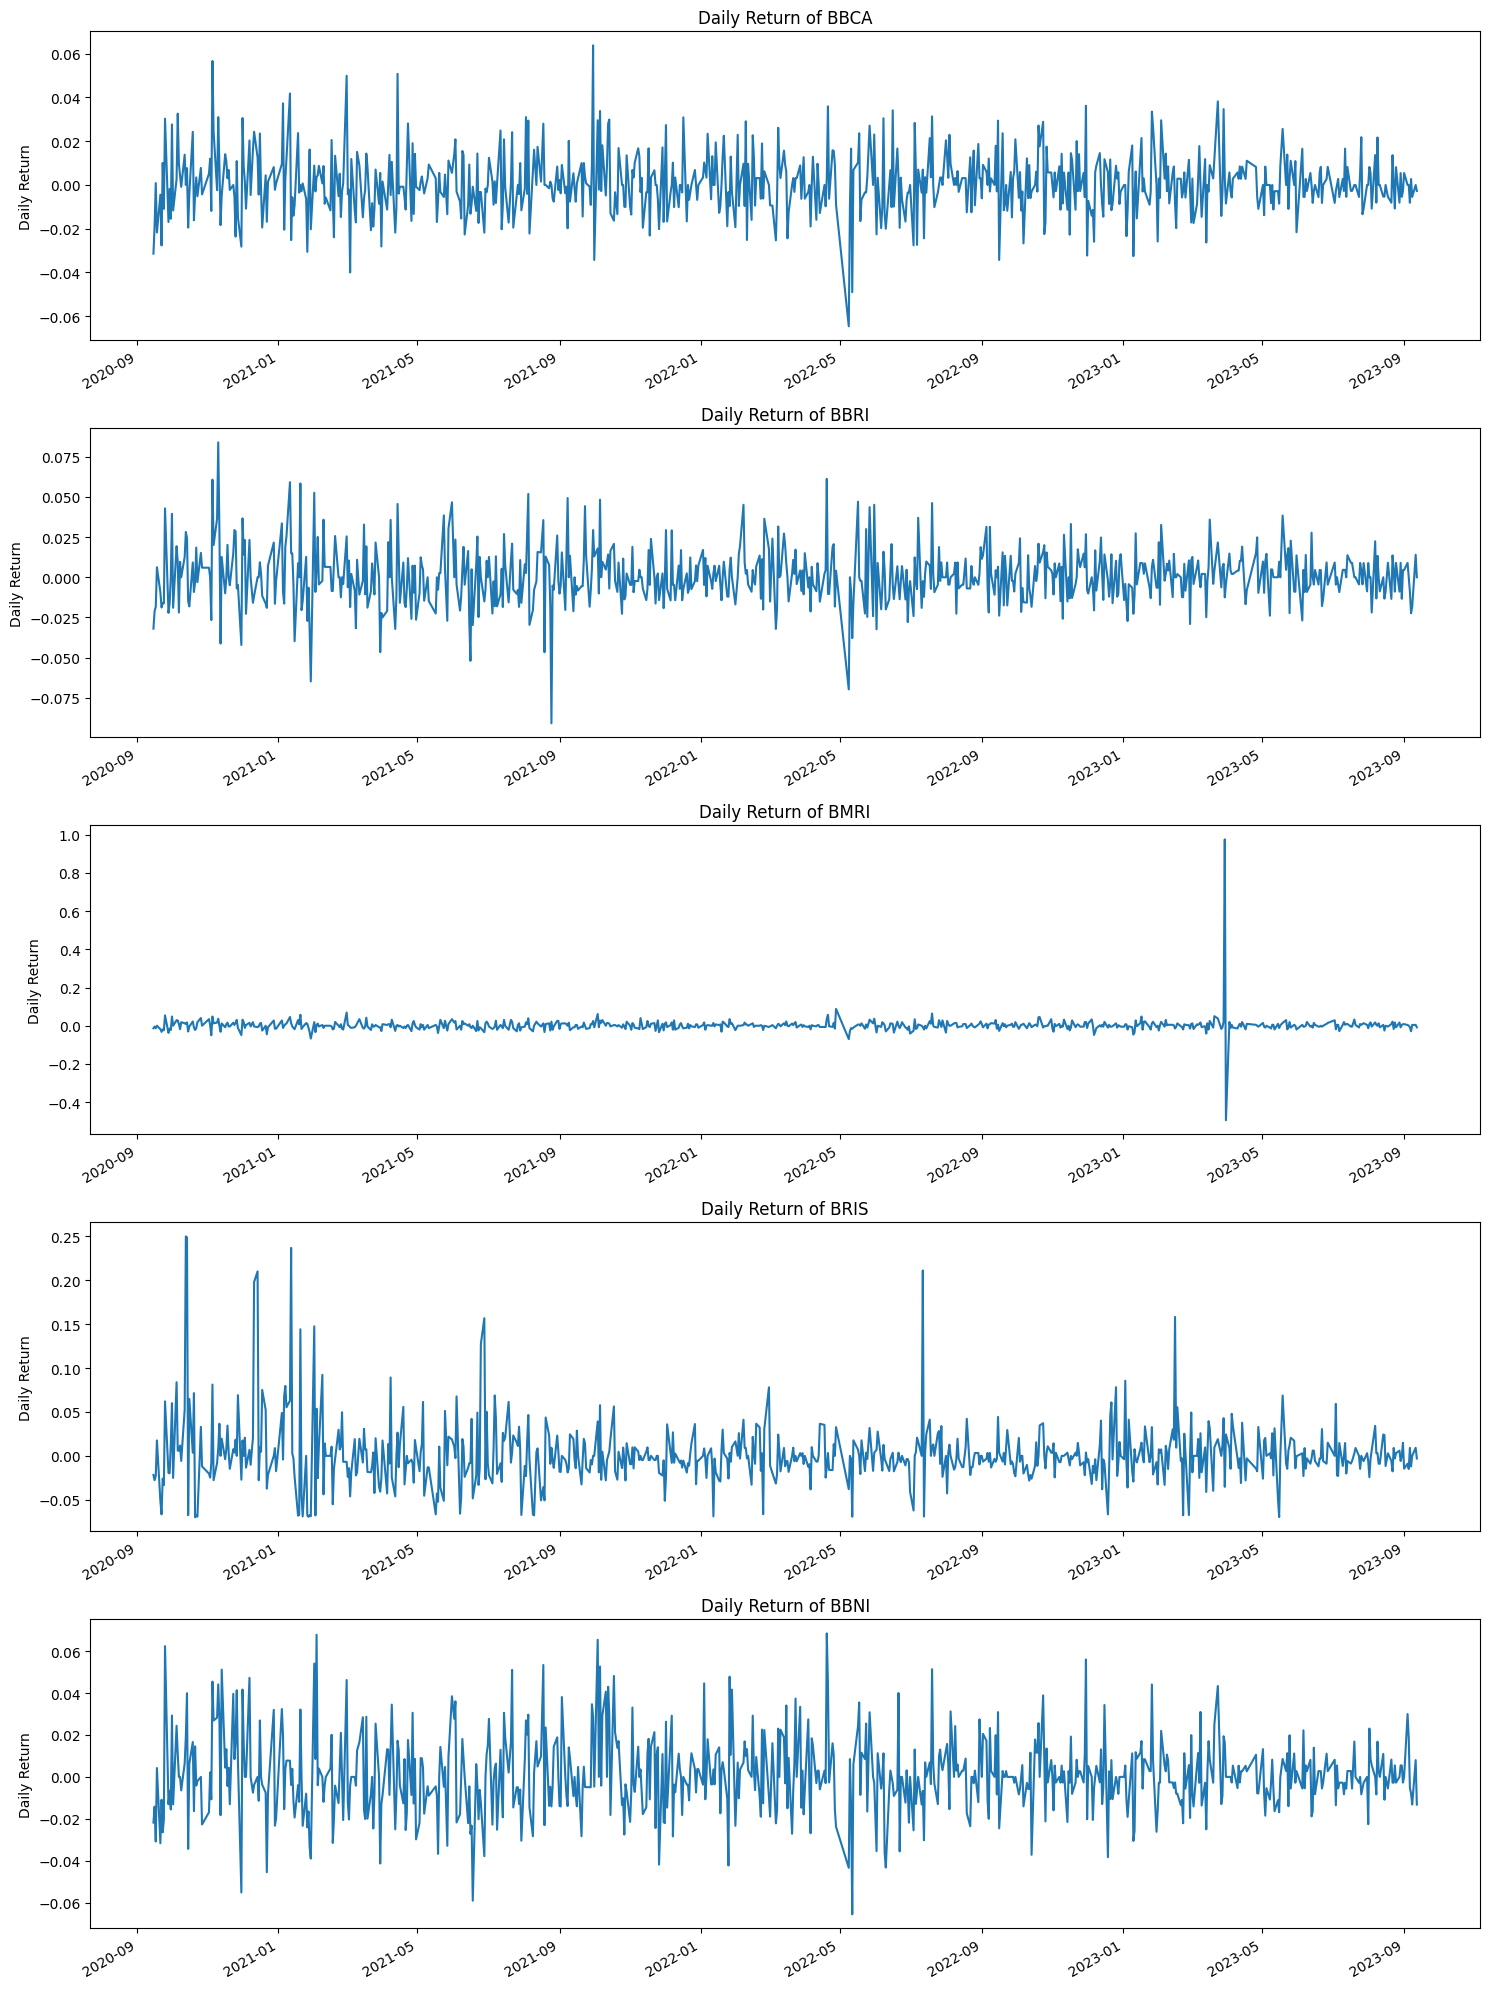

In [9]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

plt.figure(figsize=(15, 20))
for i, company in enumerate(company_list):
    plt.subplot(5, 1, i+1)
    company['Daily Return'].plot()
    plt.ylabel('Daily Return')
    plt.xlabel(None)
    plt.title(f"Daily Return of {company_name[i]}")
plt.tight_layout()

Grafik di atas menjelaskan tentang performa saham bank ditinjau dari keuntungan harian yang didapatkan (daily return). Jika dilihat dari grafik di atas, untung/rugi harian bisa dikatakan cukup stabil. Namun, terjadi anomali pada BMRI yang terjadi lonjakan yang sangat jauh pada 2023 dibandingkan dengan rata-rata untung/rugi hariannya

## How's The Correlation between Each Stock in Daily Return and Closing Price

Untuk melihat bagaimana korelasi antar kelima bank tersebut, data diambil kembali dari situs Yahoo! Finance untuk mengambil 'Adj Close'. lalu dataset tersebut akan dilakukan transformasi menggunakan fungsi dari pandas, pct_change() untuk mendapatkan data untung/rugi hariannya (daily return)

In [10]:
closing_df = pdr.get_data_yahoo(bank_list, period='3Y')['Adj Close']

bank_return = closing_df.pct_change()
bank_return.head()

[*********************100%%**********************]  5 of 5 completed


,BBCA.JK,BBNI.JK,BBRI.JK,BMRI.JK,BRIS.JK
Date,,,,,
2020-09-14,NaN,NaN,NaN,NaN,NaN
2020-09-15,-0.031405,-0.021782,-0.031977,-0.013044,-0.021739
2020-09-16,-0.018771,-0.014170,-0.021021,-0.004405,-0.027778
2020-09-17,0.000869,-0.030801,-0.018405,-0.013274,-0.022857
2020-09-18,-0.021720,0.004237,0.006250,0.000000,0.017544


Text(0.5, 1.0, 'Correlation of stock closing price')

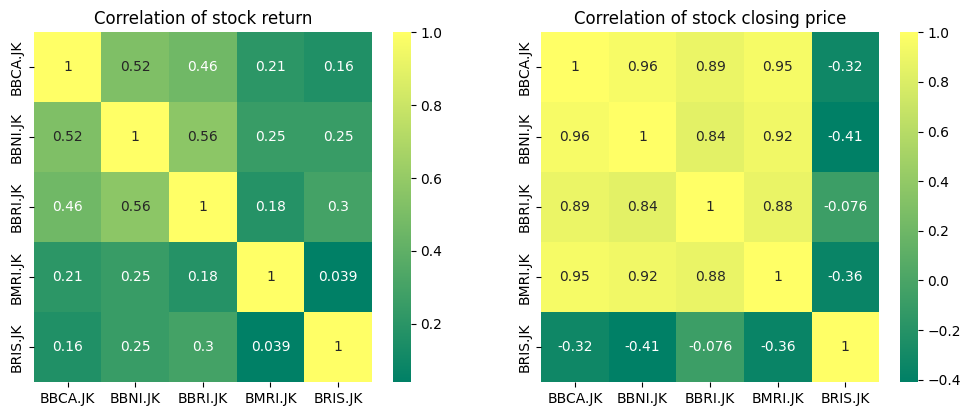

In [11]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(bank_return.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Jika ditinjau dari heatmap di atas, dapat dikatakan bahwa tidak ada korelasi yang sangat signifikan dalam hal return saham harian.

Namun, pada harga saham, 4 dari 5 bank memiliki korelasi yang sangat signifikan, hanya BRIS yang tidak memiliki korelasi dengan semua bank.

## How Much Risk is Presented by Each Stock?

Salah satu cara untuk mengetahui potensi risiko adalah dengan membandingkan rata-rata return harian dengan standar deviasi. Rata-rata return harian merupakan representasi dari nilai ekspektasi keuntungan yang diperoleh dan standar deviasi merupakan sebaran dari keuntungan yang mungkin diperoleh. Semakin besar standar deviasi, maka semakin besar pula potensi risikonya.

In [12]:
returns = bank_return.dropna()
returns.head()

,BBCA.JK,BBNI.JK,BBRI.JK,BMRI.JK,BRIS.JK
Date,,,,,
2020-09-15,-0.031405,-0.021782,-0.031977,-0.013044,-0.021739
2020-09-16,-0.018771,-0.014170,-0.021021,-0.004405,-0.027778
2020-09-17,0.000869,-0.030801,-0.018405,-0.013274,-0.022857
2020-09-18,-0.021720,0.004237,0.006250,0.000000,0.017544
2020-09-21,-0.004441,-0.031646,-0.009317,-0.017937,-0.051724


Dataset sebelumnya masih terdapat nilai yang kosong (di data awal). Hal ini dikarenakan pct_change() akan membuat presentase perubahan berdasarkan data sebelumnya. Sehingga, data pertama tidak memiliki data sebelumnya dan akan kosong. Maka dilakukan drop terhadap data tersebut.

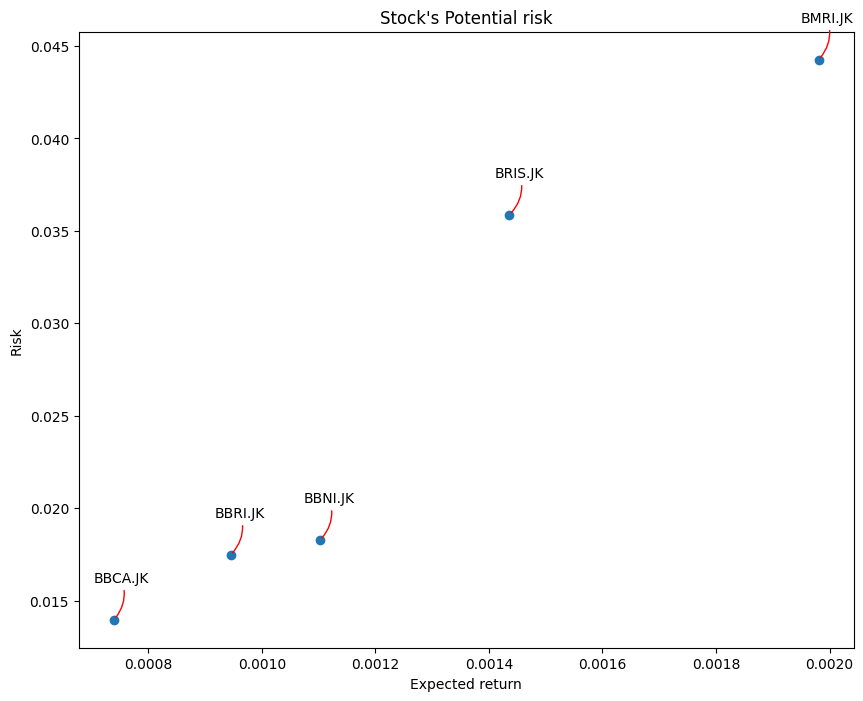

In [13]:
plt.figure(figsize=(10, 8))
plt.scatter(returns.mean(), returns.std())
plt.xlabel('Expected return')
plt.ylabel('Risk')
plt.title("Stock's Potential risk")

for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(label, xy=(x, y), xytext=(25, 25), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='red', connectionstyle='arc3,rad=-0.3'))

Terlihat bahwa BBCA memiliki potensi risiko paling rendah yaitu sekitar 1%. Diikuti oleh BBRI dan BBNI yang juga memiliki potensi risiko yang cukup rendah yaitu sekitar 1,7%. Kemudian, ada BRIS dengan 3,5% dan yang paling berisiko adalah BMRI dengan potensi risiko 4,5%.

Berdasarkan analisis tersebut, peramalan akan dilakukan pada saham BBCA yang memiliki kinerja yang baik dan potensi risiko yang paling rendah.

# Forecasting Least Risk Stock (BBCA)

Dalam melakukan forecasting saham BBCA, jumlah data yang digunakan adalah data maksimal yang bisa didapatkan dari situs Yahoo! Finance, yaitu sejak 8 Juni 2004

In [14]:
df = pdr.get_data_yahoo('BBCA.JK', period='MAX')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-06-08,175.0,180.0,175.0,177.5,106.160172,499150000
2004-06-09,177.5,182.5,175.0,180.0,107.655403,294290000
2004-06-10,180.0,180.0,177.5,180.0,107.655403,165590000
2004-06-11,177.5,180.0,177.5,180.0,107.655403,135830000
2004-06-14,180.0,180.0,175.0,177.5,106.160172,158540000
...,...,...,...,...,...,...
2023-09-06,9200.0,9250.0,9150.0,9150.0,9150.000000,49318400
2023-09-07,9125.0,9175.0,9100.0,9175.0,9175.000000,61405200
2023-09-08,9100.0,9150.0,9050.0,9125.0,9125.000000,80732300


Menampilkan pergerakan harga saham BBCA sejak tanggal 08 Juni 2004.

Text(0.5, 1.0, 'BBCA Stock Price in Rupiah')

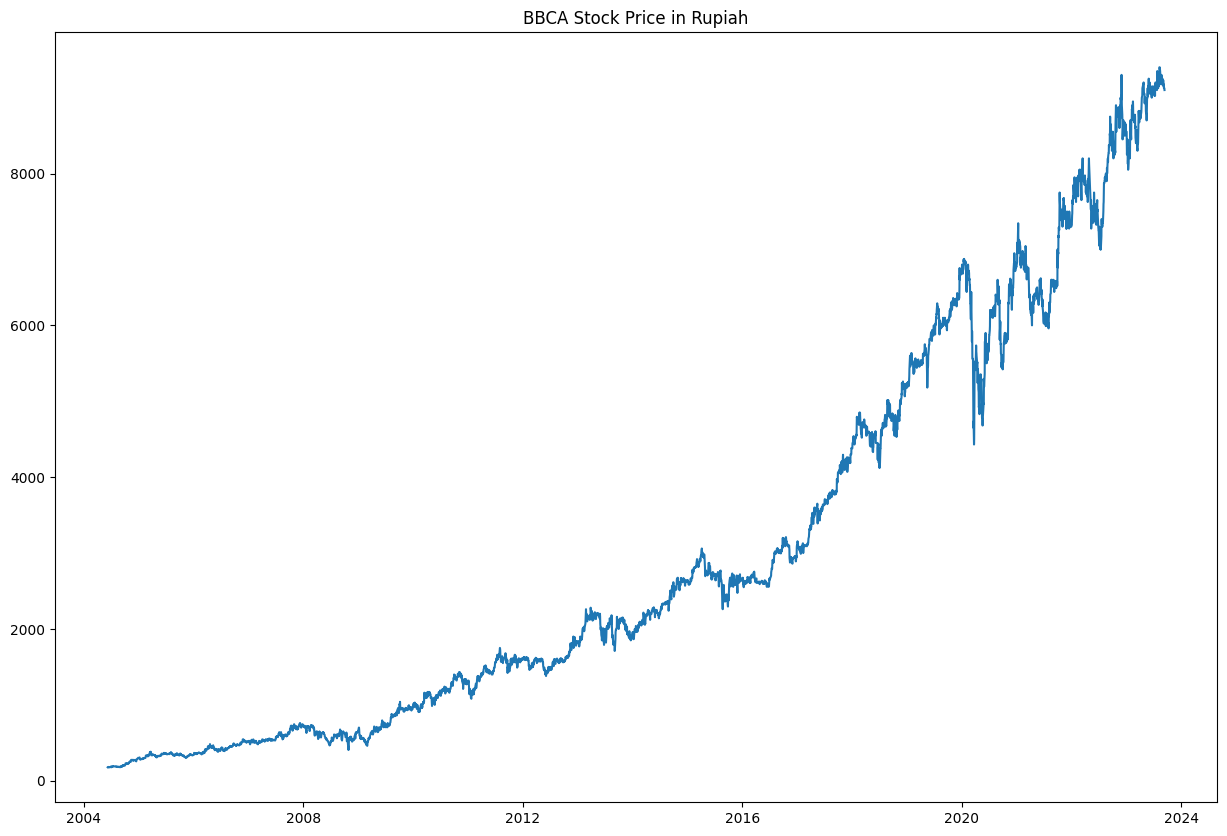

In [15]:
plt.figure(figsize=[15,10])
plt.plot(df['Close'])
plt.title('BBCA Stock Price in Rupiah')

## Split Data

Dalam time series forecasting, data yang diperlukan hanyalah data harga close. karena model akan melakukan data pada tanggal sebelumnya sebagai referensi untuk melakukan prediksi. dalam cell berikut juga dilakukan reshape untuk menyesuaikan format data agar bisa digunakan pada model.

Pada cell berikut juga didefinisikan split point atau titik pemisah untuk data train dan data test yaitu pada titik 80% (3818) dari keseluruhan panjang data (4773).

In [16]:
data = df['Close'].values
data = data.reshape(-1,1)
total_data = len(data)
split_point = int(total_data * 0.8)

print('Total data :', total_data)
print('Split Point :', split_point)

Total data : 4774
Split Point : 3819


## Data Normalization

selanjutnya, data dinormalisasi menggunakan MinMaxScaler(). MinMaxScaler akan mengubah interval data harga saham yang tadinya berkisar dari 106 - 9075 menjadi interval yang seragam dari 0 - 1 saja. MinMaxScaler dipilih karena pada konteks harga saham tidak mungkin ada nilai negatif. sehingga, interval tersebut akan menjelaskan seberapa besar perbandingan harga saham dan tidak ada titik minus ataupun negatif.

In [17]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data.shape

(4774, 1)

selanjutnya adalah membagi data latih sebesar 80% dari keseluruhan data (split point yang telah didefinisikan pada 2 cell sebelumnya). sehingga, total data untuk latih adalah 3818

In [18]:
train_data = scaled_data[:split_point]

print('Total data train :', len(train_data))

Total data train : 3819


## Windowing Data

Selanjutnya adalah melakukan windowing dari data train. data train akan dilakukan windowing dengan size 50 dan lag 1. windowing bertujuan untuk memotong sebagian kecil data (dalam hal ini size 50 data) untuk menjadikannya atribut dan label. Dalam time series diperlukan windowing karena data model akan melakukan prediksi dengan hanya menggunakan rekaman data sebelumnya.

Pada cell di bawah ini juga dilakukan reshape terhadap windowed data untuk menyesuaikan format yang akan digunakan pada model.

In [19]:
window_size = 50
lag = 1

windowed_data = []
targets = []

for i in range(0, len(train_data) - window_size - lag + 1):
    window = train_data[i:i + window_size]
    target = train_data[i + window_size + lag - 1]
    windowed_data.append(window)
    targets.append(target)

windowed_data = np.array(windowed_data)
targets = np.array(targets)
windowed_data = np.reshape(windowed_data, (windowed_data.shape[0], windowed_data.shape[1], 1))

In [20]:
windowed_data.shape

(3769, 50, 1)

## Create LSTM Model

In [26]:
model = model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(128, return_sequences=True, input_shape=(windowed_data.shape[1], 1)),
  tf.keras.layers.LSTM(64, return_sequences=False),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(5, activation="relu"),
  tf.keras.layers.Dense(1),
])

## Train Model

In [27]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

history = model.fit(windowed_data, targets,
                    epochs=15,
                    batch_size=4)

Epoch 1/15
943/943 [==============================] - 12s 8ms/step - loss: 9.3965e-04 - mae: 0.0143
Epoch 2/15
943/943 [==============================] - 8s 8ms/step - loss: 4.6187e-05 - mae: 0.0067
Epoch 3/15
943/943 [==============================] - 7s 7ms/step - loss: 4.0643e-05 - mae: 0.0062
Epoch 4/15
943/943 [==============================] - 8s 9ms/step - loss: 3.7718e-05 - mae: 0.0060
Epoch 5/15
943/943 [==============================] - 7s 8ms/step - loss: 3.8450e-05 - mae: 0.0061
Epoch 6/15
943/943 [==============================] - 8s 8ms/step - loss: 3.2471e-05 - mae: 0.0056
Epoch 7/15
943/943 [==============================] - 11s 12ms/step - loss: 3.2710e-05 - mae: 0.0056
Epoch 8/15
943/943 [==============================] - 8s 8ms/step - loss: 2.8092e-05 - mae: 0.0052
Epoch 9/15
943/943 [==============================] - 7s 8ms/step - loss: 2.7348e-05 - mae: 0.0051
Epoch 10/15
943/943 [==============================] - 8s 8ms/step - loss: 2.4826e-05 - mae: 0.0048
Epoch 

## Evaluation

In [28]:
test_data = scaled_data[len(train_data) - window_size: , :]
x_test = []
y_test = data[len(train_data):, :]
for i in range(window_size, len(test_data)):
    x_test.append(test_data[i-window_size:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

mae = mean_absolute_error(y_test, predictions)
mae

30/30 [==============================] - 1s 4ms/step


117.8887864037958

## Visualize Prediction

<ipython-input-29-61b44c5cd91c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


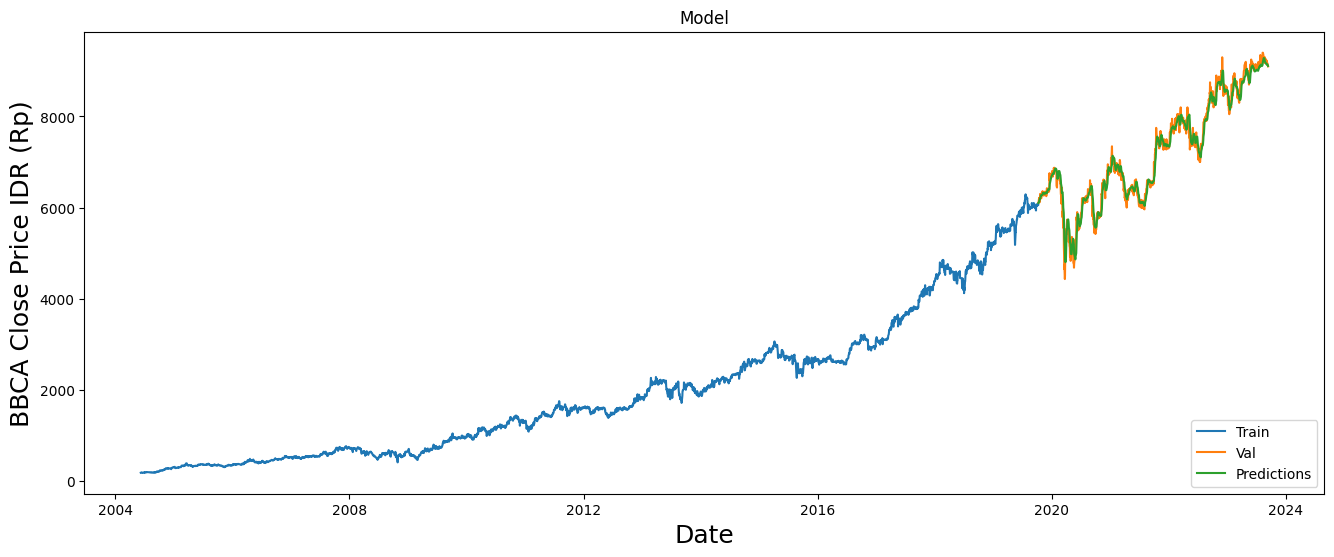

In [29]:
train = df[:split_point]
valid = df[split_point:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('BBCA Close Price IDR (Rp)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()